In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from konlpy.corpus import kolaw
from konlpy.tag import Okt; t = Okt()

import matplotlib.pyplot as plt
import platform

from wordcloud import WordCloud
from konlpy.tag import Kkma
from wordcloud import ImageColorGenerator

import numpy as np
from PIL import Image
from wordcloud import STOPWORDS

from matplotlib import font_manager, rc

kkma = Kkma()
title ='어벤져스 엔드게임'

C:\Users\wjrmf\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [4]:
def get_word(title):
    text = open(title+'/'+title+'_rev'+'.txt','r',-1,"utf-8").read()
    tokens = t.nouns(text)

    # 1글자 , 영화 제거
    tokens = [word for word in tokens if len(word) > 1 and word != '영화']

    word = nltk.Text(tokens, name='영화 리뷰')
    
    return word

In [5]:
def get_wrodcloud(word,title):

    # 폰트설정
    if platform.system()  == 'Darwin':
        rc('font',family='AppleGothic')
    elif platform.system() == 'Windows':
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:
        print('unknown system')
    
    %matplotlib inline

    data = word.vocab().most_common(1000)
    tmp_data = dict(data)
    
    movie_coloring = np.array(Image.open(title+'/'+title+'.jpg'))

    image_colors = ImageColorGenerator(movie_coloring)

    wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                         relative_scaling = 0.08, mask=movie_coloring,
                         background_color='white',max_words = 2000#,min_font_size=1,max_font_size=20,random_state=50
                         ).generate_from_frequencies(tmp_data)

    plt.figure(figsize=(30,30))
    plt.imshow(wordcloud.recolor(color_func=image_colors),interpolation='bilinear')
    plt.axis('off')
    plt.savefig(title+'/'+title+'_wordcloud'+'.png', format="png")
    plt.show()


In [4]:
word = get_word(title)

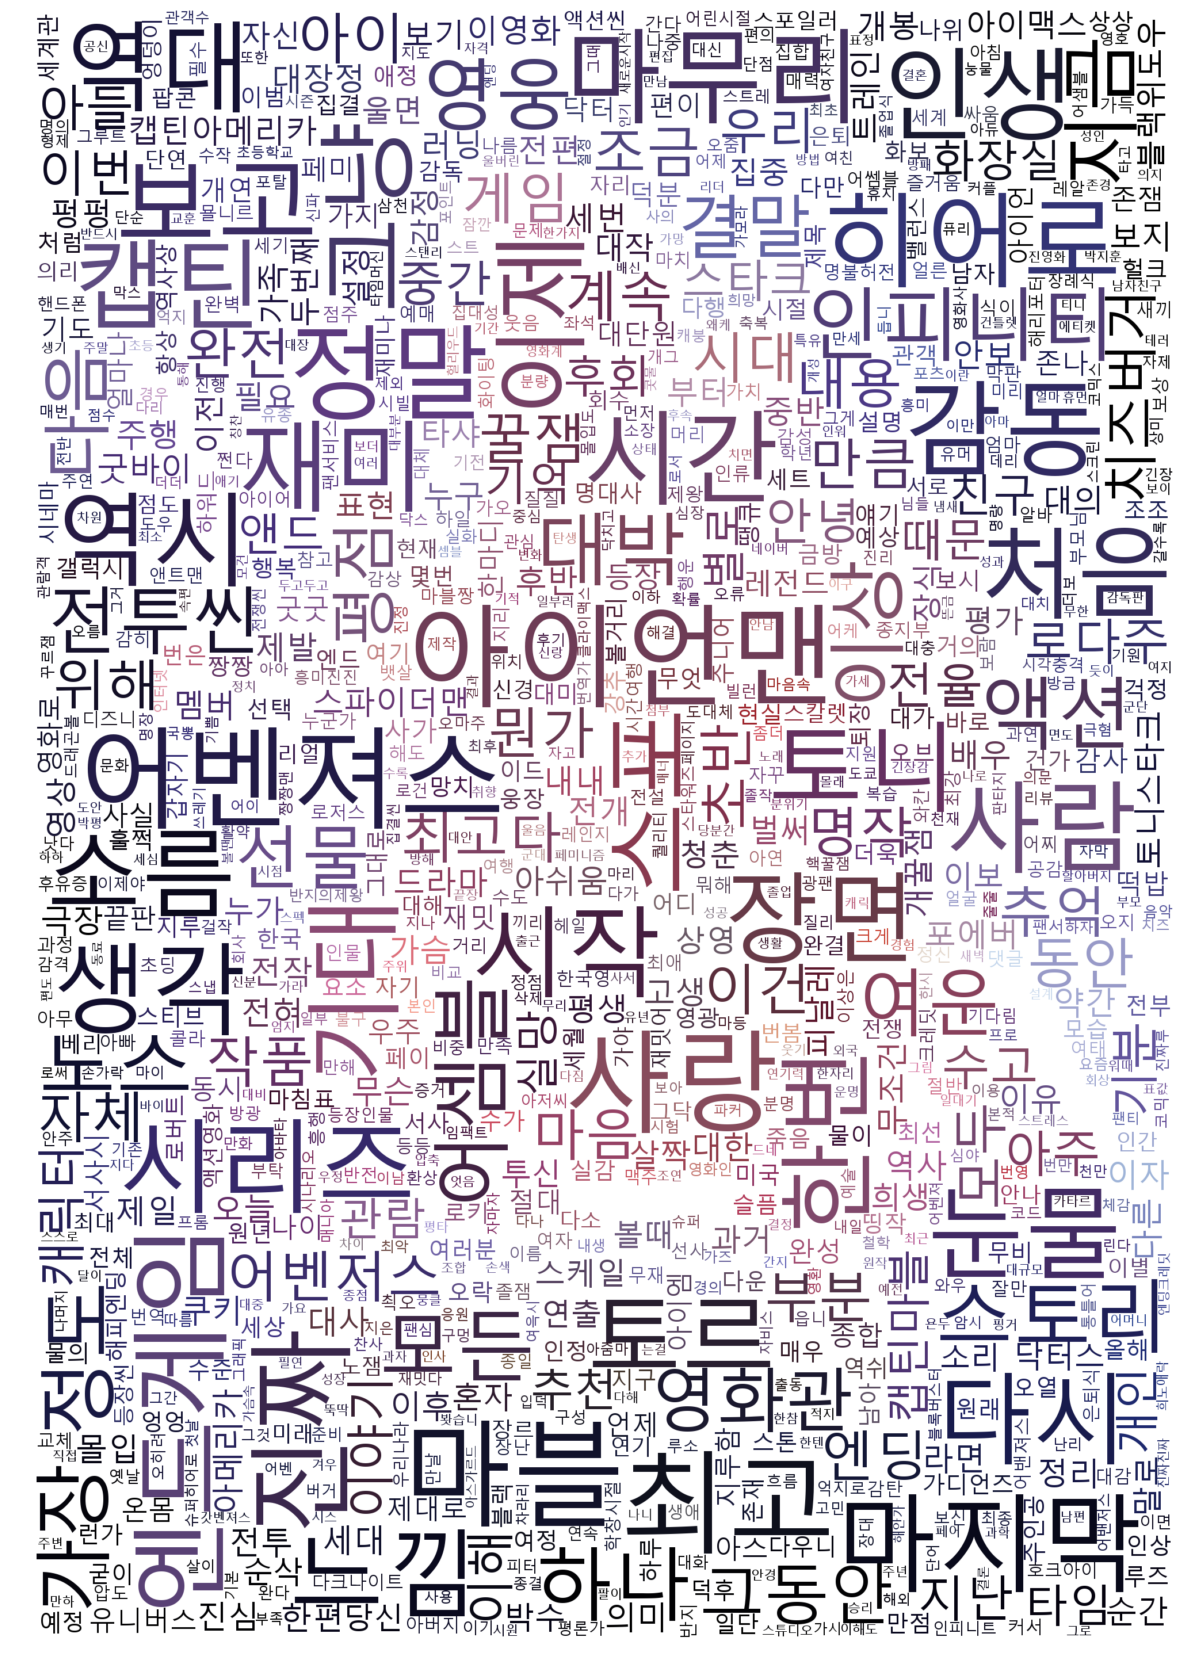

In [24]:
get_wrodcloud(word,title)